# Regresión logistica

- Aprendizaje **supervisado**

- Aprendizaje **basado en modelo**

- Se corresponde con un **modelo lineal generalizado**

- Realiza predicciones computando una **suma ponderada de las caracteristica de entrada** y sumándole una constante conocida como *bias*, pero se aplica una función logística al resultado

- Intenta predecir **valores discretos**

Conjunto de datos de entrenamiento (dataset)

$x$ = variable de entrada

$y$ = variable de salida, $y\in\{0,1\}$ Clasificación binaria,

o puede ser $y\in\{0,1,\dots,n\}$ Clasificación multiclase

$(x,y)$ = ejemplo de entrenamiento



## Función hipótesis

Podríamos abordar el problema de clasificación ignorando el hecho de que $y$ tiene un valor discreto y usar nuestro antiguo algoritmo de regresión lineal para tratar de predecir $y$ dado $x$. Sin embargo, es fácil construir ejemplos en los que este método funciona muy mal. Intuitivamente, tampoco tiene sentido que $h(x)$ tome valores mayores que 1 o menores que 0 cuando sabemos que $y\in{0, 1}$, por esto se define

$$
h_{\theta}(x)=g(\theta^Tx)
$$

donde
$$
g(z)=\frac{1}{1+e^{-z}}
$$


se llama **función logística** o **función sigmoidea**. Aquí hay una trama
mostrando g(z):

<img src="fig5.png" alt="Drawing" style="width: 500px;"/>

Observe que g(z) tiende a 1 cuando $z\rightarrow\infty$, y $g(z)$ tiende a 0 cuando $z\rightarrow-\infty$. Además, $g(z)$, y por lo tanto también $h_{\theta}(x)$, siempre está acotado entre 0 y 1. Como antes, mantenemos la convención de $x_0 = 1$, de modo que $\theta^Tx= \theta_0 + \sum_{i=1}^n θ_ix_i$
.

Una propiedad útil de la derivada de la función sigmoidea, que escribimos como $g′$:
\begin{eqnarray*}
g'(z)&=&\frac{\delta}{\delta z}\frac{1}{1+e^{-z}}\\
&=&\frac{1}{(1+e^{-z})^2}(e^{-z})\\
&=&\frac{1}{1+e^{-z}}\left(1-\frac{1}{1+e^{-z}}\right)\\
&=&g(z)(1-g(z))\\
\end{eqnarray*}



Supongamos que $h_{\theta}(x)$ es la probabilidad de que $y=1$ para una entrada $x$, es decir
\begin{eqnarray*}
P(y=1\ |\ x;\theta)&=&h_{\theta}(x)\\
P(y=0\ |\ x;\theta)&=&1-h_{\theta}(x)\\
\end{eqnarray*}


Note que esto se puede escribir de forma más compacta como

$$
P(y\ |\ x;\theta)=h_{\theta}(x)^y[1-h_{\theta}(x)]^{1-y}
$$

Suponiendo que los $n$ ejemplos de entrenamiento se generaron de forma independiente, podemos escribir la función de verosimilitud de los parámetros como

\begin{eqnarray}
L(\theta)&=&\prod_{i=1}^n P(y_i\ |\ x_i;\theta)\\
&=&\prod_{i=1}^n (h_{\theta}(x_i))^{y_i}(1-h_{\theta}(x_i))^{1-y_i}\\
\end{eqnarray}

## Función de costo

La función de costo, corresponde con la $\log$ verosimilitud:
$$
J(\theta)=\log L(\theta)=\sum_{i=1}^n y_i\log(h_{\theta}(x_i))+(1-y_i)\log(1-h_{\theta}(x_i))
$$

## Función de optimización (Gradient Descent)

¿Cómo maximizamos la verosimilitud? Similar a nuestra derivación en el caso de la regresión lineal
$$
\max_{\theta} J(\theta)
$$
usando el ascenso de gradiente o equivalentemente si multiplicamos por -1
$$
\min_{\theta} J(\theta)=\min_{\theta} (-\log L(\theta))
$$
usando el descenso de gradiente, esto debido a que ahora estamos minimizando, en lugar de maximizar una función cóncava.

Como en la regresión, el algoritmo iteractivo consiste en repetir el siguiente proceso hasta que $\theta_0$ y $\theta_1$ no varien
$$
\theta_j = \theta_j + \alpha \frac{\delta}{\delta \theta_j} J(\theta).
$$
Supongamos que $h_{\theta}(x)=g(\theta_0+\theta_1x_1+\theta_2x_2)$, entonces
\begin{eqnarray*}
\theta_0&=\theta_0 + \alpha \frac{\delta}{\delta \theta_0} J(\theta)&=\theta_0 + \alpha(h_{\theta}(x)-y)\\
\theta_1&=\theta_1 + \alpha \frac{\delta}{\delta \theta_1} J(\theta)&=\theta_1 + \alpha\ x_1(h_{\theta}(x)-y)\\
\theta_2&=\theta_2 + \alpha \frac{\delta}{\delta \theta_2} J(\theta)&=\theta_2 + \alpha\ x_2(h_{\theta}(x)-y)\\
\end{eqnarray*}

## Regularización

Las estrategias de regularización incorporan penalizaciones a la función de costo $J(\theta)$, con el objetivo de evitar **overfitting**, reducir varianza, atenuar el efecto de la correlación entre predictores y minimizar la influencia en el modelo de los predictores menos relevantes. Por lo general, aplicando regularización se consigue modelos con mayor poder predictivo (generalización).

Dado que estos métodos de regularización actúan sobre la magnitud de los coeficientes del modelo, todos deben de estár en la misma escala, por esta razón es necesario estandarizar o normalizar los predictores antes de entrenar el modelo.

La función de optimización de la regresión logística de la clase binaria con término de regularización $r(\theta)$ minimiza la siguiente función de costo:
$$
\min_{\theta} (-\log L(\theta))+r(\theta)
$$
Actualmente la libreria `Scikit-learn` ofrecemos cuatro opciones para el termino de regularización a través del argumento de penalización `penalty` de la forma:

<img src="rw.png" alt="Drawing" style="width: 230px;"/>

Para *ElasticNet*, $\rho$ (corresponde a la ratio del parametro $\mathcal{l}_1$) controla la fuerza de la regularización $\mathcal{l}_1$ frente a la regularización $\mathcal{l}_2$. Elastic-Net es equivalente a $\mathcal{l}_1$ cuando $\rho=1$ y equivalente a $\mathcal{l}_2$ cuando $\rho=0$.

## Evaluación de los resultados

- Una vez preprocesado el conjunto de datos y entrenado el algoritmo de Machine Learning para generar el modelo, se requiere de un mecanismo para verificar si el modelo funciona adecuadamente

- Existen diferentes formas de evaluar los resultados de un algoritmo:

    - **Métricas numéricas**:
        - Precisión, Exhaustividad, Exactitud ...
    - **Representaciones gráficas**:
        - Curva ROC, curva PR ...

## Matriz de confusión

- **Verdadero Positivo (VP)**: Es un ejemplo que se ha clasificado correctamente como perteneciente a la clase "1" o positiva

- **Verdadero Negativo (VN)**: Es un ejemplo que se ha clasificado correctamente como perteneciente a la clase "0" o negativa

- **Falso Positivo (FP)**: Es un ejemplo que se ha clasificado correctamente como perteneciente a la clase "1" pero realmente pertenece a la clase "0"

- **Falso negativo (FN)**: Es un ejemplo que se ha clasificado correctamente como perteneciente a la clase "0" pero realmente pertenece a la clase "1"

<img src="fig6.jpg" alt="Drawing" style="width: 400px;"/>

## Métricas

- **Precisión (precision)**: Se calcula dividiendo el número de verdaderos positivos por la suma del número de verdaderos positivos y el número de falsos positivos
$$
Precisión=\frac{Verdaderos\ Positivos}{Verdaderos\ Positivos\ +\ Falsos\ Positivos}
$$
La precisión nos indica el porcentaje de valores que se han clasificado como positivos son realmente positivos

- **Exhaustividad (recall)**: Se calcula dividiendo el número de verdaderos positivos por la suma del número de verdaderos positivos y el número de falsos negativos
$$
Recall=\frac{Verdaderos\ Positivos}{Verdaderos\ Positivos\ +\ Falsos\  negativos}
$$
La precisión nos indica el porcentaje de valores positivos que son correctamente clasificados

- **Exactitud (accuracy)**: Suma del número de verdaderos positivos y el número de verdaderos negativos dividido por el número total de ejemplos

- **Tasa de error (error rate)**: Se calcula restando la exactitud del valor 1, es decir la tasa de error = 1 - Exactitud

- **Ratio de Falsos Positivos**: Se calcula dividiendo el número de falsos positivos y el número de negativos reales

- **F1-score** se puede interpretar como un promedio ponderado de la precisión y la exactitud (recall), donde el *F1-score* alcanza su valor en 1 y el peor puntaje en 0.

- La contribución relativa de la precisión y la exactitud al F1-score es la misma

- La fórmula para el puntaje F1-score es:
$$
\textit{F1-score}=2*\frac{precision\ *\ recall}{precision\ +\ recall}
$$

## Curva ROC (Receiver Operating Characteristic)

Las **curvas ROC** suelen representar la tasa de verdaderos positivos en el $Y$ y la tasa de falsos positivos en el eje $X$. Esto significa que la **esquina superior izquierda de la gráfica es el punto "ideal"**, una tasa de falsos positivos de cero y una tasa de verdaderos positivos de uno. Como consecuencia un área más grande debajo de la curva (AUC) suele ser mejor 

<img src="fig7.png" alt="Drawing" style="width: 400px;"/>

## Curva PR (Precision-Recall)

**Curva PR**: Un área grande debajo de la curva representa tanto alta exactitud como alta precisión, donde la alta precisión se relaciona con una baja tasa de falsos positivos, y la alta exactitud se relaciona con una baja tasa de falsos negativos. **La esquina superior izquierda de la gráfica es el punto "ideal"**.

<img src="fig8.png" alt="Drawing" style="width: 400px;"/>

# Ejemplo

El conjunto de datos contienen transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales ni más información general sobre los datos. Las características V1, V2, … V28 son los principales componentes obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Cantidad' es la cantidad de la transacción, esta función se puede utilizar para el aprendizaje sensible a los costos dependiente del ejemplo. Feature 'Class' es la variable de respuesta y toma valor 1 en caso de fraude y 0 en caso contrario.

## Importar librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
#Metricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Funciones auxiliares

In [2]:
# Construcción de un pipeline para los atributos numéricos
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbst_scaler', RobustScaler()),
    ])

In [3]:
# Transormador para codificar únicamente las columnas categoricas y devolver un df
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._oh = OneHotEncoder(sparse=False)
        self._columns = None
    def fit(self, X, y=None):
        X_cat = X.select_dtypes(include=['object'])
        self._columns = pd.get_dummies(X_cat).columns
        self._oh.fit(X_cat)
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_cat = X_copy.select_dtypes(include=['object'])
        X_num = X_copy.select_dtypes(exclude=['object'])
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh, 
                                columns=self._columns, 
                                index=X_copy.index)
        X_copy.drop(list(X_cat), axis=1, inplace=True)
        return X_copy.join(X_cat_oh)

In [4]:
# Transofrmador que prepara todo el conjunto de datos llamando pipelines y transformadores personalizados
class DataFramePreparer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._full_pipeline = None
        self._columns = None
    def fit(self, X, y=None):
        num_attribs = list(X.select_dtypes(exclude=['object']))
        cat_attribs = list(X.select_dtypes(include=['object']))
        self._full_pipeline = ColumnTransformer([
                ("num", num_pipeline, num_attribs),
                ("cat", CustomOneHotEncoder(), cat_attribs),
        ])
        self._full_pipeline.fit(X)
        self._columns = pd.get_dummies(X).columns
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_prep = self._full_pipeline.transform(X_copy)
        return pd.DataFrame(X_prep, 
                            columns=self._columns, 
                            index=X_copy.index)

## Carga de datos

In [5]:
dataset = pd.read_csv("creditcard.csv")

### Análisis de datos exploratorios

Las siguientes secciones analizan algunas inspecciones de datos de alto nivel.

**Estadísticas descriptivas**

Lo primero que debemos hacer es recopilar una idea básica de nuestros datos. Recuerde, a excepción de la transacción y el monto, no conocemos los nombres de otras columnas. Lo único que sabemos es que los valores de esas columnas han sido escalados. Veamos la forma y las columnas de los datos:

In [6]:
dataset.shape

(284807, 31)

In [7]:
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Como se muestra, los nombres de las variables son anodinos (V1, V2, etc.). Además, el tipo de datos de todo el conjunto de datos es flotante, excepto Clase, que es de tipo entero.

¿Cuántos son fraude y cuántos no son fraude? Comprobemos:

In [8]:
class_names = {0:'No Fraude', 1:'Fraude'}
print(dataset.Class.value_counts().rename(index = class_names))

No Fraude    284315
Fraude          492
Name: Class, dtype: int64


Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172 % de todas las transacciones.

La mayoría de las transacciones no son fraudulentas. Si utilizamos este conjunto de datos como base para nuestro modelado, la mayoría de los modelos no pondrán suficiente énfasis en las señales de fraude; los puntos de datos no fraudulentos ahogarán cualquier peso que proporcionen las señales de fraude. Tal como están las cosas, podemos encontrar dificultades para modelar la predicción del fraude, y este desequilibrio lleva a los modelos a asumir simplemente que todas las transacciones no son fraude. Este sería un resultado inaceptable. Exploraremos algunas formas de abordar este tema en las secciones siguientes.

In [9]:
# Visualizamos los tipos de cada uno de los atributos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Comprobamos si alguna columna tiene valores nulos
dataset.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [11]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## División del conjunto de datos

El conjunto de prueba es una muestra de los datos que retenemos de nuestro análisis y modelado. Lo usamos al final de nuestro proyecto para confirmar la precisión de nuestro modelo final. Es la prueba final que nos da confianza en nuestras estimaciones de precisión de datos invisibles. Usaremos el 80% del conjunto de datos para el entrenamiento del modelo y el 20% para las pruebas:

Dado que el dataframe es desbalanceado, utilizamos el parámetro de estratificación hace una división para que la proporción de valores en la muestra producida sea la misma que la proporción de valores proporcionados por el parámetro **stratify** de la función **train_test_split**. 

In [12]:
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
validation_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=validation_size, 
                                                   random_state=seed, 
                                                   stratify=dataset["Class"])

In [13]:
Y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

## Preparación del conjunto de datos¶

In [14]:
# Instanciamos nuestro transformador personalizado
data_preparer = DataFramePreparer()

In [15]:
# Hacemos el fit con el conjunto de datos general para que adquiera todos los valores posibles
data_preparer.fit(X)

DataFramePreparer()

## Escalado del conjunto de datos

Por norma general, los algoritmos de Machine Learning no se comportan adecuadamente si los valores de las características que reciben como entrada se encuentran en rangos muy dispares. Por ello, se utilizan distintas técnicas de escalado. **Importante tener en cuenta que estos mecanismos de escalado no deben aplicarse sobre las etiquetas.**
* **Normalización:** Los valores del atributo se escalan para adquirir un valor entre 0 y 1
* **Estandarización:** Los valores del atributo se escalan y reciben un valor similar pero no se encuentra dentro de un rango

**Es importante que para probar estos valores se realicen las transformaciones solo sobre el conjunto de datos de entrenamiento. Después, se aplicaran sobre el conjunto de datos de prueba para testear.**

In [16]:
# Transformamos el subconjunto de datos de entrenamiento
X_train_prep = data_preparer.transform(X_train)

In [17]:
X_train.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
128340,78676.0,-0.999916,0.444869,0.820501,-1.492318,-0.302746,-1.484973,0.227987,0.216145,-1.865137,...,0.178611,-0.209519,-1.149528,0.069974,0.259223,0.334282,-0.726982,-0.177592,-0.118796,47.75
3889,3456.0,-1.255712,0.233087,1.889266,-0.383876,1.184700,1.238693,0.416418,0.531286,-0.351078,...,-0.008758,0.000313,0.096979,-0.020837,-0.911278,0.205187,0.313961,0.045247,0.051500,42.95
62623,50347.0,-1.920730,1.397131,0.922263,1.212760,-0.557102,1.521844,-1.027909,1.667727,0.156894,...,-0.381429,-0.303654,-0.887132,-0.276220,-1.308956,0.469674,-0.308179,-0.456212,-0.174672,17.81
36593,38608.0,1.254452,-0.810990,1.052806,-0.735200,-1.410761,-0.056601,-1.215284,0.228571,-0.616175,...,0.058496,0.475635,1.283407,-0.063944,0.269698,0.280091,-0.049809,0.045949,0.015315,22.00
108337,70852.0,-1.332723,0.487730,-0.502495,-0.185740,0.927767,0.946815,2.859374,-0.223567,-1.546564,...,-0.185548,0.400932,1.420386,-0.101173,-0.837584,1.093588,1.149629,-0.001493,-0.096190,309.90


In [18]:
X_train_prep.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
128340,-0.070678,-0.455285,0.270549,0.334099,-0.924930,-0.190568,-1.037644,0.167080,0.361560,-1.462389,...,0.699301,-0.434138,-1.079751,0.262260,0.274832,0.475681,-1.188238,-1.105317,-0.990858,0.359813
3889,-0.954382,-0.569683,0.119521,0.891456,-0.228664,0.950528,1.296539,0.334648,0.949536,-0.241606,...,0.155826,0.071758,0.084225,-0.031163,-1.199143,0.282385,0.644614,0.271210,0.306735,0.292741
62623,-0.403494,-0.867096,0.949633,0.387167,0.774259,-0.385698,1.539199,-0.949757,3.069859,0.167971,...,-0.925124,-0.661095,-0.834728,-0.856339,-1.699925,0.678406,-0.450825,-2.826420,-1.416613,-0.058548
36593,-0.541407,0.552923,-0.625039,0.455245,-0.449348,-1.040583,0.186471,-1.116384,0.384743,-0.455353,...,0.350900,1.217742,1.192101,-0.170445,0.288022,0.394539,0.004103,0.275549,0.031017,0.000000
108337,-0.162596,-0.604125,0.301114,-0.355838,-0.104205,0.753422,1.046399,2.507107,-0.458837,-1.205524,...,-0.356962,1.037635,1.320010,-0.290739,-1.106342,1.612603,2.116027,-0.017512,-0.818606,4.022916


In [19]:
# Transformamos el subconjunto de datos de validacion
X_test_prep = data_preparer.transform(X_test)

In [20]:
LG = LogisticRegression()
LG.fit(X = X_train_prep, y = Y_train)

LogisticRegression()

In [21]:
print("Accuracy de entrenamiento:", LG.score(X, Y))

Accuracy de entrenamiento: 0.9982338917231669


In [22]:
# Accuracy de test del modelo 
# ==============================================================================
Y_pred = LG.predict(X = X_test_prep)

print(accuracy_score(Y_test, Y_pred))

0.9992451107756047


## Matriz de Confusión

In [23]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test, Y_pred)
cm

array([[56859,     5],
       [   38,    60]], dtype=int64)

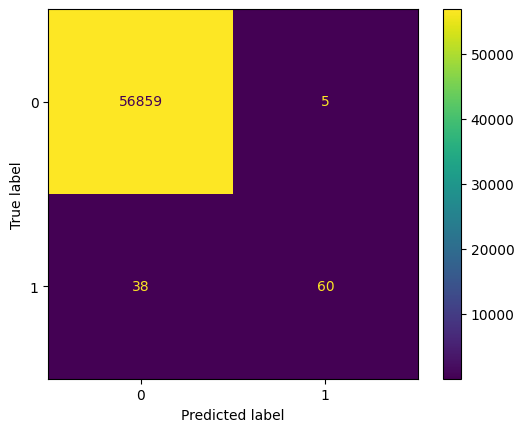

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LG.classes_)
disp.plot()

## Métricas derivadas de la matriz de confusión

In [25]:
from sklearn.metrics import precision_score

print("Precisión:", precision_score(Y_test, Y_pred))

Precisión: 0.9230769230769231


In [26]:
from sklearn.metrics import recall_score

print("Recall:", recall_score(Y_test, Y_pred))

Recall: 0.6122448979591837


In [27]:
from sklearn.metrics import f1_score

print("F1 score:", f1_score(Y_test, Y_pred))

F1 score: 0.7361963190184049


## Curvas ROC y PR

### Curva ROC

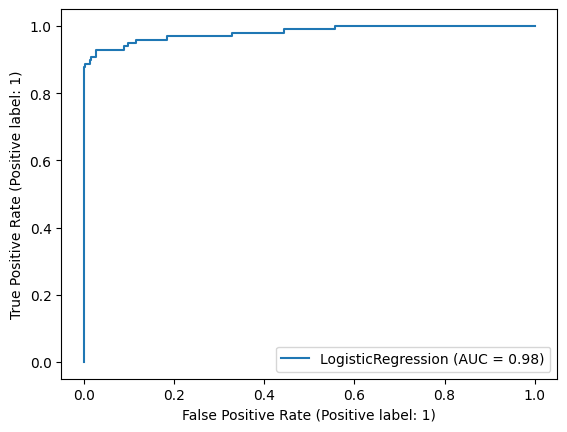

In [28]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(LG, X_test_prep, Y_test)

## Curva PR

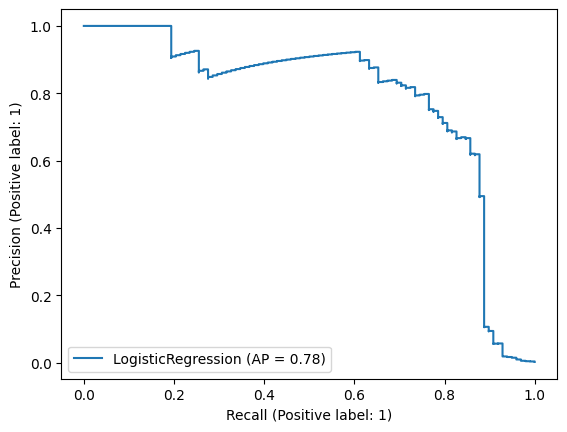

In [29]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(LG, X_test_prep, Y_test)